## Analísis Topologico de Datos para la segmentacion de imagenes tumorales

In [27]:
# Importar las funciones
import matplotlib.pyplot as plt
import numpy as np
from scripts.image_processing import abrir_svs, mostrar_niveles, procesar_imagenes, convertir_y_binarizar
from scripts.tda_analysis import betti_numeros
from scripts.visualization import mostrar_en_grid
from ripser import Rips

## Obtenemos los parches de una imagen WSI

In [10]:
svs_file_paths = ['./data/svs-cancer/MSB-00263-04-05.svs']

coordenadas = [[(0, 0), (5800, 17100), (17000, 11800)]]

tam = [[(1618, 1668), (400, 400), (400, 400)]]

niveles = [[2, 1, 1]]

# Procesar imágenes
regiones_wsi = procesar_imagenes(svs_file_paths, coordenadas, niveles, tam)

Niveles de resolución disponibles: 3
Nivel 0: (25895, 26695)
Nivel 1: (6473, 6673)
Nivel 2: (1618, 1668)


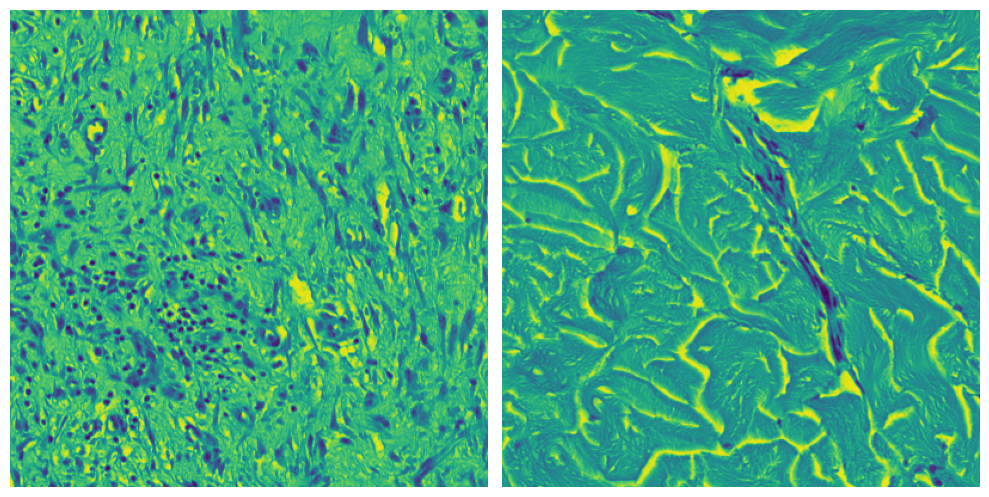

In [33]:
mostrar_en_grid(regiones_wsi, 1, 2)

### Obtenemos el primer parche generado (parche 0)

In [13]:
umbral_t = 255
# Binarizar las imágenes
imagenes_binarizadas_cancer_0 = convertir_y_binarizar([regiones_wsi[0]], umbral_t)

# Obtenemos el numero de betti beta 1 para cada B(t)
betas1_0 = []
for t, img_bin in enumerate(imagenes_binarizadas_cancer_0):
    beta1, ciclos_matriz = betti_numeros(img_bin)
    betas1_0.append(beta1)

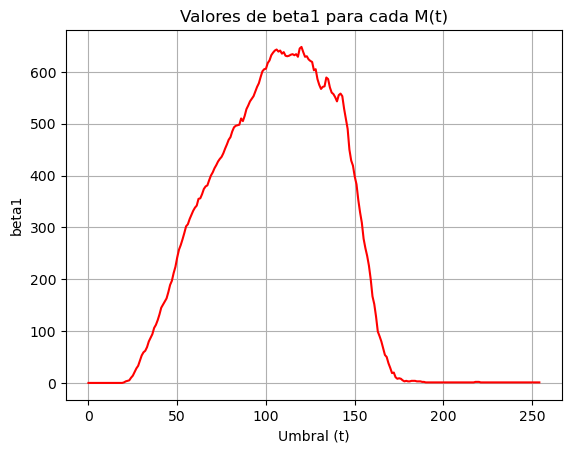

In [25]:
# Generar el eje x (por ejemplo, el índice de cada imagen binaria)
x_values_0 = range(len(imagenes_binarizadas_cancer_0))

# Graficar los valores de beta1 en función del índice de la imagen
plt.plot(x_values_0, betas1_0, linestyle='-', color='red')
# Etiquetas y título
plt.xlabel('Umbral (t)')
plt.ylabel('beta1')
plt.title('Valores de beta1 para cada M(t)')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


/Users/lucianoandresjuarezlopez/anaconda3/envs/CienciaDeDatos/lib/python3.12/site-packages/ripser/ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(


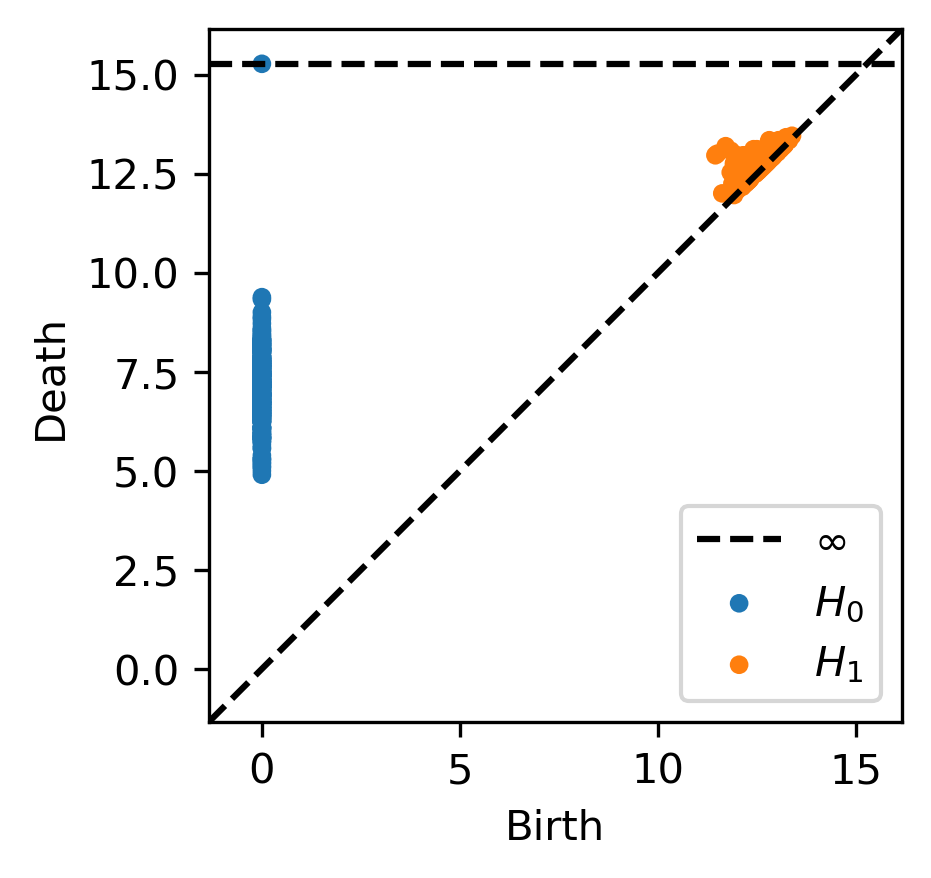

In [28]:
rips = Rips(maxdim=1)
diagrams = rips.fit_transform(np.array(imagenes_binarizadas_cancer_0[150]))

# Graficar el diagrama de persistencia
plt.figure(dpi=300, figsize=(3, 3))
rips.plot(diagrams, show=True)
plt.show()

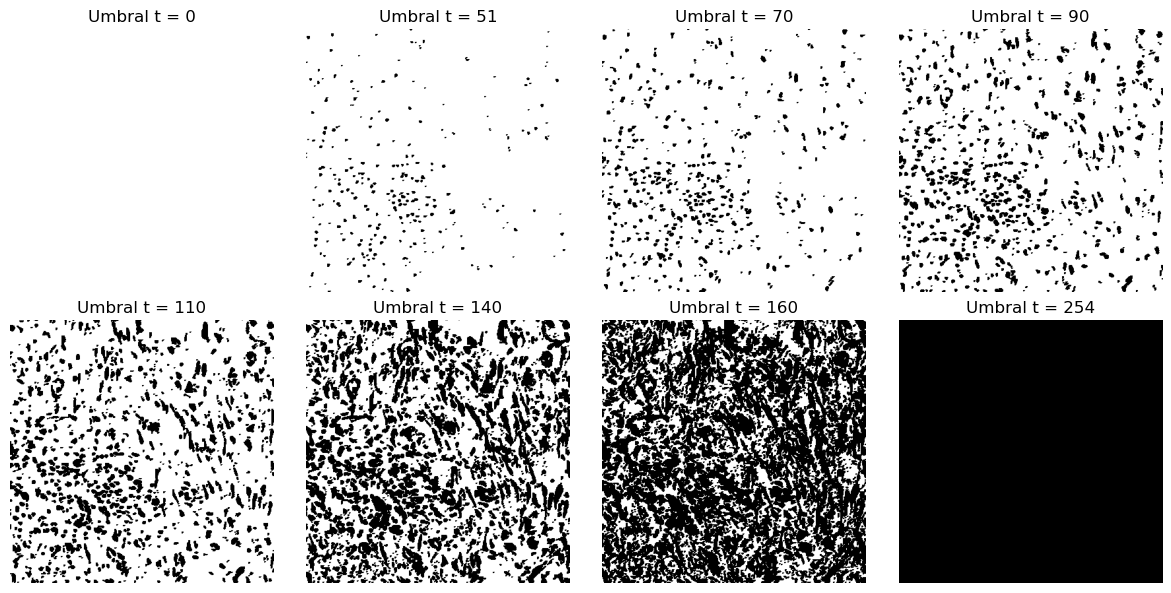

In [29]:
# Seleccionar las matrices específicas
indices = [0, 51, 70, 90, 110, 140, 160, 254]
matrices_seleccionadas = [imagenes_binarizadas_cancer_0[i] for i in indices]

# Definir el tamaño del grid (por ejemplo, 2 filas y 4 columnas)
filas, columnas = 2, 4

# Crear una figura y ejes
fig, axs = plt.subplots(filas, columnas, figsize=(12, 6))

# Agregar cada imagen al grid
for i, ax in enumerate(axs.flatten()):
    ax.imshow(matrices_seleccionadas[i] * 255, cmap='gray', vmin=0, vmax=255)
    ax.axis('off')
    ax.set_title(f'Umbral t = {indices[i]}')
    
# Ajustar el layout y mostrar la figura
plt.tight_layout()
plt.show()

### Obtenemos el primer parche generado (parche 1)

In [30]:
umbral_t = 255
# Binarizar las imágenes
imagenes_binarizadas_cancer_1 = convertir_y_binarizar([regiones_wsi[1]], umbral_t)

# Obtenemos el numero de betti beta 1 para cada B(t)
betas1_1 = []
for t, img_bin in enumerate(imagenes_binarizadas_cancer_1):
    beta1, ciclos_matriz = betti_numeros(img_bin)
    betas1_1.append(beta1)

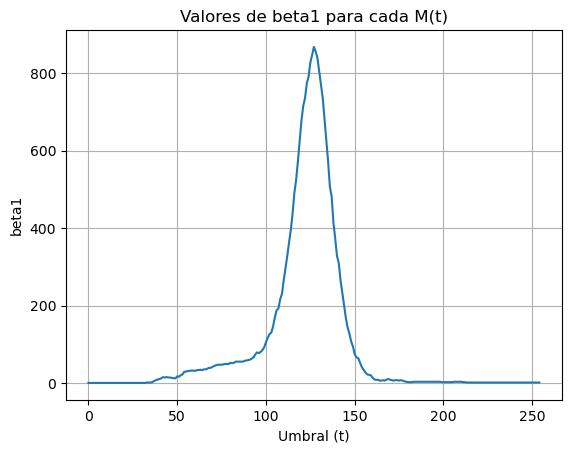

In [31]:
# Generar el eje x (por ejemplo, el índice de cada imagen binaria)
x_values_1 = range(len(imagenes_binarizadas_cancer_1))

# Graficar los valores de beta1 en función del índice de la imagen
plt.plot(x_values_1, betas1_1, linestyle='-')
# Etiquetas y título
plt.xlabel('Umbral (t)')
plt.ylabel('beta1')
plt.title('Valores de beta1 para cada M(t)')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

## Comparamos las graficas de los betti 1 obtenidas por cada parche

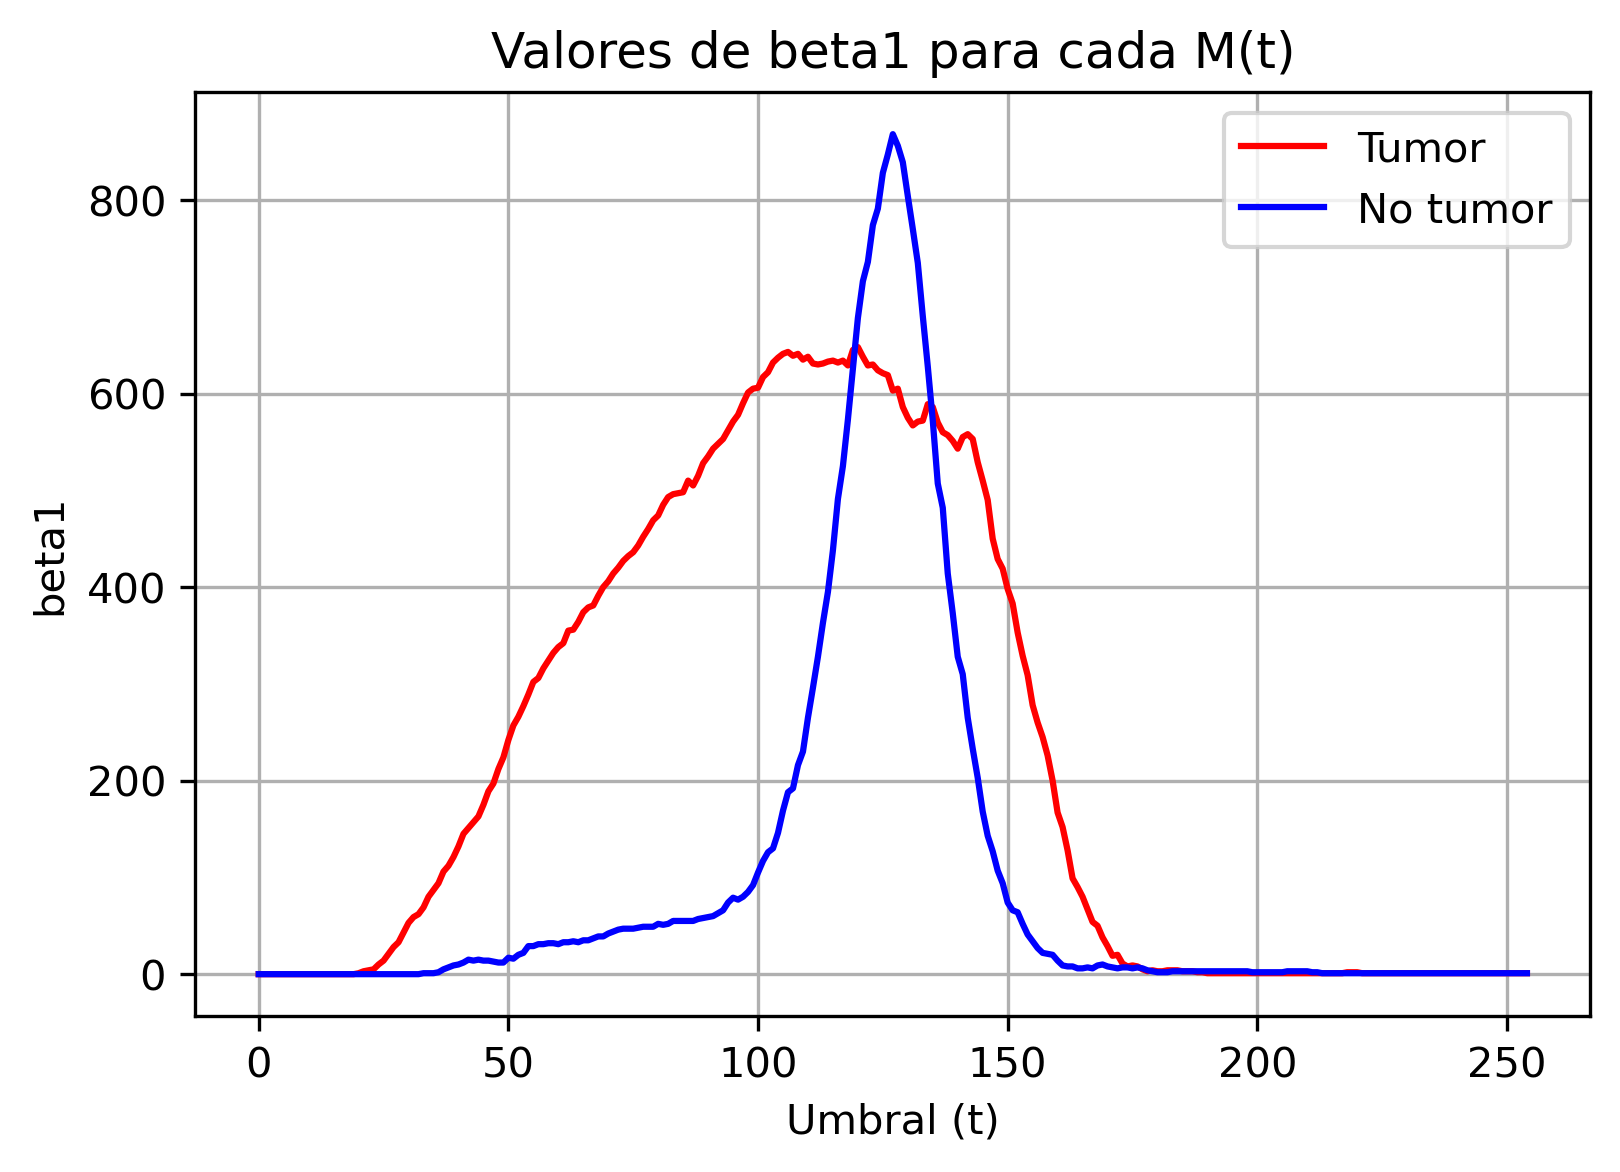

In [32]:
# Generar el eje x (por ejemplo, el índice de cada imagen binaria)
x_values_0 = range(len(imagenes_binarizadas_cancer_0))
x_values_1 = range(len(imagenes_binarizadas_cancer_1))

# Crear la figura y los ejes
plt.figure(dpi=300, figsize=(6, 4))

# Graficar los valores de beta1 para el primer conjunto de datos
plt.plot(x_values_0, betas1_0, color='red', linestyle='-', label='Tumor')

# Graficar los valores de beta1 para el segundo conjunto de datos
plt.plot(x_values_1, betas1_1, color='blue', linestyle='-', label='No tumor')

# Etiquetas y título
plt.xlabel('Umbral (t)')
plt.ylabel('beta1')
plt.title('Valores de beta1 para cada M(t)')

# Mostrar la cuadrícula
plt.grid(True)

# Agregar la leyenda
plt.legend()